# CS438 FINAL PROJECT

by Ryan Zurrin

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

from models.utils import *

In [3]:
csv_path = "labels/features_balanced_scaled.csv"

In [4]:
features = pd.read_csv(csv_path)

In [6]:
features.drop(columns=[
    'label', 'score', 'coords1', 'coords2', 'coords3', 'coords4',
    'resized_coords1', 'resized_coords2', 'resized_coords3',
    'resized_coords4', 'ExposureInuAs', 'histogram_mean'
], inplace=True)

In [7]:
len(features)

33064

In [8]:
# Separate the features and target label
X = features.drop('target_label', axis=1)
y = features['target_label']

In [9]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000)

# Fit the model
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3243
           1       0.63      0.62      0.62      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613



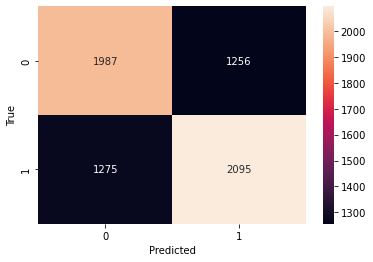

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


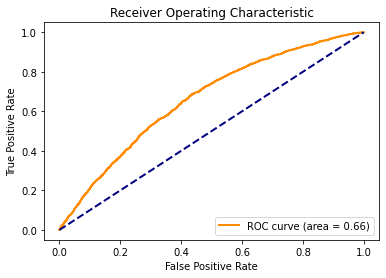

In [12]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


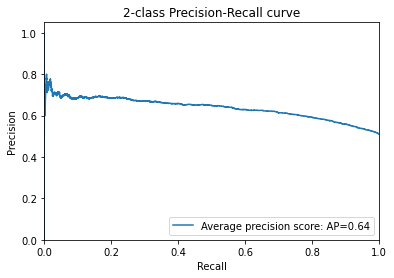

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_val, y_prob)

precision, recall, _ = precision_recall_curve(y_val, y_prob)

plt.step(recall, precision, where='post', label='Average precision score: AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()


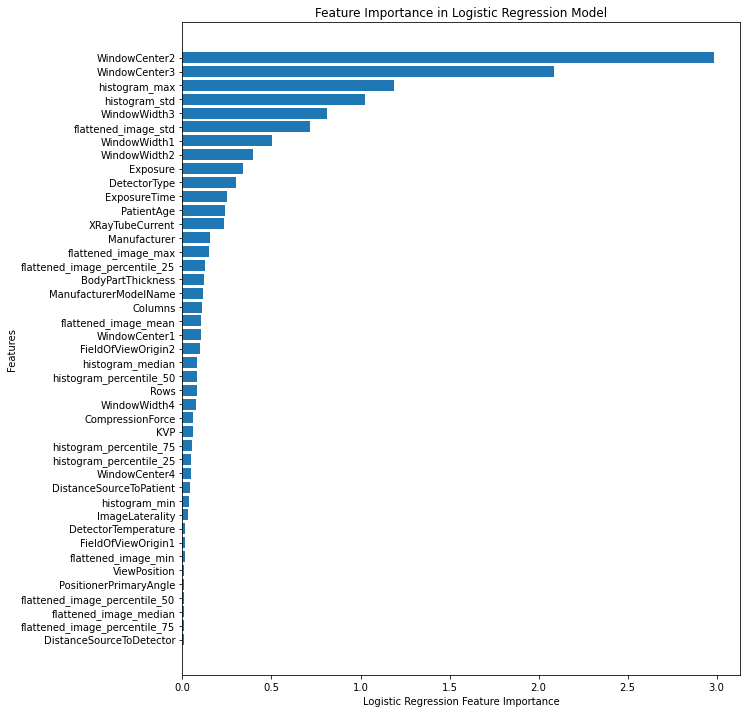

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is your trained Logistic Regression model
feature_importance = abs(log_reg.coef_[0])
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 12))  # You can adjust the dimensions (width, height) as needed
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Logistic Regression Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


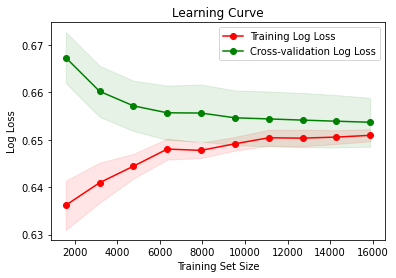

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define the range of training sizes and the number of folds for cross-validation
train_sizes = np.linspace(0.1, 1.0, 10)
n_jobs = -1 # Use all available cores

train_sizes, train_scores, validation_scores = learning_curve(
    log_reg, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_log_loss', n_jobs=n_jobs)

# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)  # Note the negative sign
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = -np.mean(validation_scores, axis=1)  # Note the negative sign
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std,
                 validation_mean + validation_std, color="g", alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Log Loss")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation Log Loss")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.show()
